In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("artifacts/preprocessed_data.csv")
df.head(3)

,Content,Label,num_words
0,notability magnus howie tag placed magnus howi...,0,237
1,big plan,0,2
2,najbolje je idea jean idea drug ako see bird m...,1,16


In [3]:
df.dropna(how='any', inplace=True)

In [4]:
import mlflow
import dagshub

from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [5]:
import os
import warnings
warnings.filterwarnings("ignore")

from dotenv import load_dotenv
load_dotenv()

uri = os.getenv("MLFLOW_URI")
repo_owner = os.getenv("OWNER")
repo_name = os.getenv("REPO")

In [6]:
if uri is None:
	raise ValueError("MLFLOW_URI environment variable is not set.")
mlflow.set_tracking_uri(uri)

if repo_owner is None:
	raise ValueError("Missing dagshub logging environment credentials.")
dagshub.init(repo_owner=repo_owner, repo_name=repo_name, mlflow=True)

mlflow.set_experiment("Tuning XgBoost")

Accessing as SubinoyBera

Initialized MLflow to track repo "SubinoyBera/Toxic-TweetTagger"

Repository SubinoyBera/Toxic-TweetTagger initialized!

<Experiment: artifact_location='mlflow-artifacts:/0cce527ae5ba440aa1fd240c0c5612e3', creation_time=1752481316142, experiment_id='5', last_update_time=1752481316142, lifecycle_stage='active', name='Tuning XgBoost', tags={}>

In [7]:
def log_model_params(model):
    params_to_log = {}
    params_to_log["n_estimators"] = model.n_estimators
    params_to_log["learning_rate"] = model.learning_rate
    params_to_log["max_depth"] = model.max_depth
    params_to_log["reg_lambda"] = model.reg_lambda
    params_to_log["gamma"] = model.gamma

    mlflow.log_params(params_to_log)

In [9]:
def run_experiment(X_train, X_test, y_train, y_test):
    try:
        with mlflow.start_run(run_name='XGB-1'):

            mlflow.log_param("vectorizer", "TF-IDF")
            mlflow.log_param("num_features", 3000)

            model = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=12, gamma=0.1, reg_lambda=1, 
                                 subsample=0.8, n_jobs=-1, random_state=42, use_label_encoder=False)

            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)

            log_model_params(model)

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred)

            mlflow.log_metric("accuracy", float(accuracy))
            mlflow.log_metric("precision", float(precision))
            mlflow.log_metric("recall", float(recall))
            mlflow.log_metric("f1", float(f1))
            print("Done!")

            print(f"\n\n Accuary: {accuracy}\n Precision: {precision}\n Recall: {recall}\n f1 score: {f1}\n roc-auc: {roc_auc}")

    except Exception as e:
        print(f"Error in model training and or tracking: {e}")
        raise e

In [10]:
vec1 = TfidfVectorizer(max_features=3000, min_df=3)

X = vec1.fit_transform(df['Content'])
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
run_experiment(X_train, X_test, y_train, y_test)

Done!


 Accuary: 0.821375
 Precision: 0.8219886553219886
 Recall: 0.8206879320396435
 f1 score: 0.8213377787038967
 roc-auc: 0.821375401023574
🏃 View run XGB-1 at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/5/runs/7eec81d90856404bbcb04ca4663f7f38
🧪 View experiment at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/5


In [15]:
# Register model
model_name = "XGB_Model"
run_id = input("Enter the run ID to register the model: ")

model_uri = f"runs:/{run_id}/{model_name}"
mlflow.register_model(model_uri=model_uri, name=model_name)

Successfully registered model 'XGB_Model'.
2025/07/16 11:02:03 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGB_Model, version 1
Created version '1' of model 'XGB_Model'.


<ModelVersion: aliases=[], creation_timestamp=1752643916876, current_stage='None', description='', last_updated_timestamp=1752643916876, name='XGB_Model', run_id='7eec81d90856404bbcb04ca4663f7f38', run_link='', source='mlflow-artifacts:/0cce527ae5ba440aa1fd240c0c5612e3/7eec81d90856404bbcb04ca4663f7f38/artifacts/XGB_Model', status='READY', status_message=None, tags={}, user_id='', version='1'>

In [11]:
def run_experiment(X_train, X_test, y_train, y_test):
    try:
        with mlflow.start_run(run_name='XGB-3'):

            mlflow.log_param("vectorizer", "TF-IDF")
            mlflow.log_param("num_features", 3500)

            model = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=15, gamma=0.1, reg_lambda=1, 
                                 subsample=0.8, n_jobs=-1, random_state=42, use_label_encoder=False)

            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)

            log_model_params(model)

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred)

            mlflow.log_metric("accuracy", float(accuracy))
            mlflow.log_metric("precision", float(precision))
            mlflow.log_metric("recall", float(recall))
            mlflow.log_metric("f1", float(f1))
            print("Done!")

            print(f"\n\n Accuary: {accuracy}\n Precision: {precision}\n Recall: {recall}\n f1 score: {f1}\n roc-auc: {roc_auc}")

    except Exception as e:
        print(f"Error in model training and or tracking: {e}")
        raise e

In [13]:
vec3 = TfidfVectorizer(max_features=3500, min_df=3)

X = vec3.fit_transform(df['Content'])
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

run_experiment(X_train, X_test, y_train, y_test)

Done!


 Accuary: 0.8210833333333334
 Precision: 0.8222612183504637
 Recall: 0.8195219455317732
 f1 score: 0.8208892967381329
 roc-auc: 0.8210842446744999
🏃 View run XGB-3 at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/5/runs/aa8093baed5e423e974c391304e4f628
🧪 View experiment at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/5


In [14]:
# Register model
model_name = "XGB_Model"
run_id = input("Enter the run ID to register the model: ")

model_uri = f"runs:/{run_id}/{model_name}"
mlflow.register_model(model_uri=model_uri, name=model_name)

Registered model 'XGB_Model' already exists. Creating a new version of this model...
2025/07/17 09:07:12 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGB_Model, version 2
Created version '2' of model 'XGB_Model'.


<ModelVersion: aliases=[], creation_timestamp=1752723426084, current_stage='None', description='', last_updated_timestamp=1752723426084, name='XGB_Model', run_id='aa8093baed5e423e974c391304e4f628', run_link='', source='mlflow-artifacts:/0cce527ae5ba440aa1fd240c0c5612e3/aa8093baed5e423e974c391304e4f628/artifacts/XGB_Model', status='READY', status_message=None, tags={}, user_id='', version='2'>

In [ ]:
def run_experiment(X_train, X_test, y_train, y_test):
    try:
        with mlflow.start_run(run_name='XGB-2'):

            mlflow.log_param("vectorizer", "TF-IDF")
            mlflow.log_param("num_features", 3000)

            model = XGBClassifier(n_estimators=700, learning_rate=0.1, max_depth=10, gamma=0.1, reg_lambda=1, 
                                 subsample=0.8, n_jobs=-1, random_state=42, use_label_encoder=False)

            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)

            log_model_params(model)

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred)

            mlflow.log_metric("accuracy", float(accuracy))
            mlflow.log_metric("precision", float(precision))
            mlflow.log_metric("recall", float(recall))
            mlflow.log_metric("f1", float(f1))
            print("Done!")

            print(f"\n\n Accuary: {accuracy}\n Precision: {precision}\n Recall: {recall}\n f1 score: {f1}\n roc-auc: {roc_auc}")

    except Exception as e:
        print(f"Error in model training and or tracking: {e}")
        raise e

In [19]:
vec2 = TfidfVectorizer(max_features=3000, min_df=3)

X = vec2.fit_transform(df['Content'])
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

run_experiment(X_train, X_test, y_train, y_test)

Done!


 Accuary: 0.8176666666666667
 Precision: 0.8202803659867371
 Recall: 0.8138585824935455
 f1 score: 0.817056856187291
 roc-auc: 0.8176688893456638
🏃 View run XGB-2 at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/5/runs/d1667990a7bb49f6ac8ce21f6b5421a3
🧪 View experiment at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/5


In [8]:
def run_experiments(X_train, X_test, y_train, y_test):
    try:
        with mlflow.start_run(run_name='XGB-4'):

            mlflow.log_param("vectorizer", "TF-IDF")
            mlflow.log_param("num_features", 3000)

            model= XGBClassifier(n_estimators=800, learning_rate=0.05, max_depth=15, gamma=0.5, reg_lambda=1, 
                                 subsample=0.8, n_jobs=-1, random_state=42, use_label_encoder=False)

            model.fit(X_train, y_train)
            
            log_model_params(model)

            y_pred = model.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred)

            mlflow.log_metric("accuracy", float(accuracy))
            mlflow.log_metric("precision", float(precision))
            mlflow.log_metric("recall", float(recall))
            mlflow.log_metric("f1", float(f1))
            print("Done!")

            print(f"\n\n Accuary: {accuracy}\n Precision: {precision}\n Recall: {recall}\n f1 score: {f1}\n roc-auc: {roc_auc}")

    except Exception as e:
        print(f"Error in model training and or tracking: {e}")
        raise e
    

vec2 = TfidfVectorizer(max_features=3000, min_df=3)

X = vec2.fit_transform(df['Content'])
y = df['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

run_experiments(X_train, X_test, y_train, y_test)

Done!


 Accuary: 0.8092220461936129
 Precision: 0.8171792883604722
 Recall: 0.794455146997236
 f1 score: 0.8056570118066763
 roc-auc: 0.8091558543984271
🏃 View run XGB-4 at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/5/runs/c5a39178b4ad49da838ced9d09b753ec
🧪 View experiment at: https://dagshub.com/SubinoyBera/Toxic-TweetTagger.mlflow/#/experiments/5


In [17]:
def run_experiments(X_train, X_test, y_train, y_test):
    try:
        
        #with mlflow.start_run(run_name="XGB Models Experiment"):

        model= XGBClassifier(n_estimators=700, max_depth=10, learning_rate=0.01, subsample=0.8, n_jobs=-1)

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        
        print(f"\n\n Accuary: {accuracy}\n Precision: {precision}\n Recall: {recall}\n f1 score: {f1}\n roc-auc: {roc_auc}")
        
    except Exception as e:
        print(f"Error in model training and or tracking: {e}")
        raise e

In [18]:
run_experiments(X_train, X_test, y_train, y_test)



 Accuary: 0.772867506045193
 Precision: 0.8146792525524947
 Recall: 0.7058921715907194
 f1 score: 0.7563942049722768
 roc-auc: 0.772806132446476


In [ ]:
%cd ..

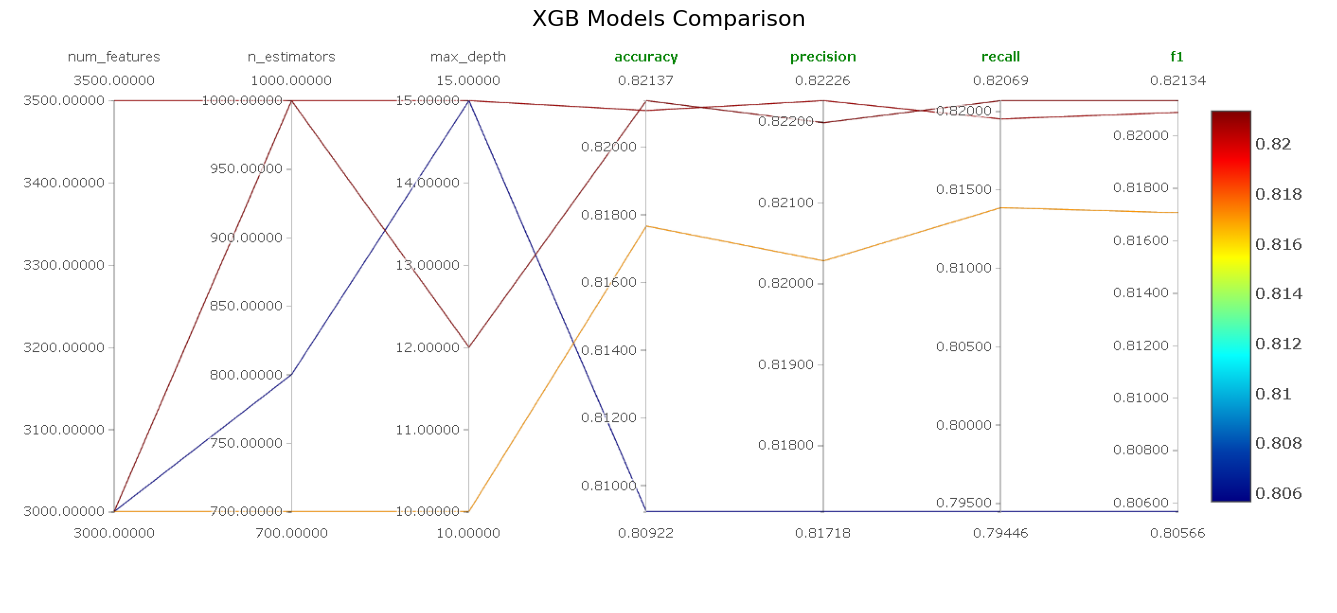

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("images/tuning_xgb.png")
plt.figure(figsize=(17, 13))
plt.imshow(img)
plt.title("XGB Models Comparison", fontsize=16, color='black')
plt.axis('off')
plt.show()

From the experiments we select the XgBoost Model with n_estimators=1000 and max_depth=15 as the best model as we are focusing on accuracy score more than other metrics.